
#Running YOLOv7 instance segmentation



<h2>Installing YOLOv7 and the github repo<h2>

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# clone YOLOv7 repository
%cd {HOME}
!git clone https://github.com/WongKinYiu/yolov7
!git clone https://github.com/gSayak/cup-disc-YoloV7.git

# navigate to yolov7 directory and checkout u7 branch of YOLOv7 - this is hash of lates commit from u7 branch as of 12/21/2022
%cd {HOME}/yolov7
!git checkout 44f30af0daccb1a3baecc5d80eae22948516c579

/content
Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.41 MiB | 30.66 MiB/s, done.
Resolving deltas: 100% (486/486), done.
Cloning into 'cup-disc-YoloV7'...
remote: Enumerating objects: 12, done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 12
Unpacking objects: 100% (12/12), 68.89 MiB | 10.18 MiB/s, done.
/content/yolov7
Note: switching to '44f30af0daccb1a3baecc5d80eae22948516c579'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting 

#Installing Requirements

In [3]:
%cd {HOME}/yolov7/seg
!pip install --upgrade pip
!pip install -r requirements.txt

/content/yolov7/seg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21

#Prediction on custom weight

In [9]:
%cd {HOME}/yolov7/seg
!python segment/predict.py \
--weights '/content/cup-disc-YoloV7/weights/best.pt' \
--conf 0.25 \
--source '/content/fundus.jpg'

/content/yolov7/seg
segment/predict: weights=['/content/cup-disc-YoloV7/weights/best.pt'], source=/content/fundus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-4-27 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 325 layers, 37847870 parameters, 0 gradients, 141.9 GFLOPs
image 1/1 /content/fundus.jpg: 512x640 1 cup, 1 disk, 2414.2ms
Speed: 2.6ms pre-process, 2414.2ms inference, 18.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp4


#Display the segmented Image

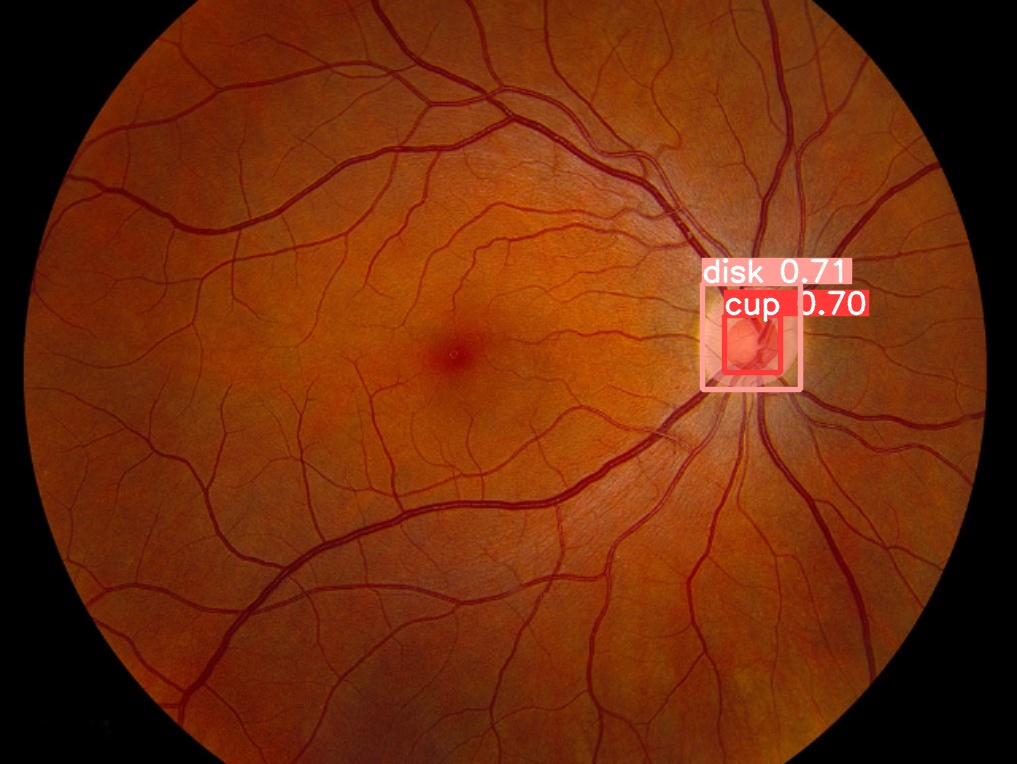

In [12]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov7/seg/runs/predict-seg/exp/*.jpg')[:2]:
      display(Image(filename=imageName))
      print("\n")